In [4]:
pip install matplotlib seaborn pandas pyodbc

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Define SQL Server connection parameters
server = 'MESSAYD\MSSQLSERVER01'          
database = 'TigitWBG'  

C:\Users\CompUser\AppData\Local\Temp\ipykernel_5224\2403225765.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


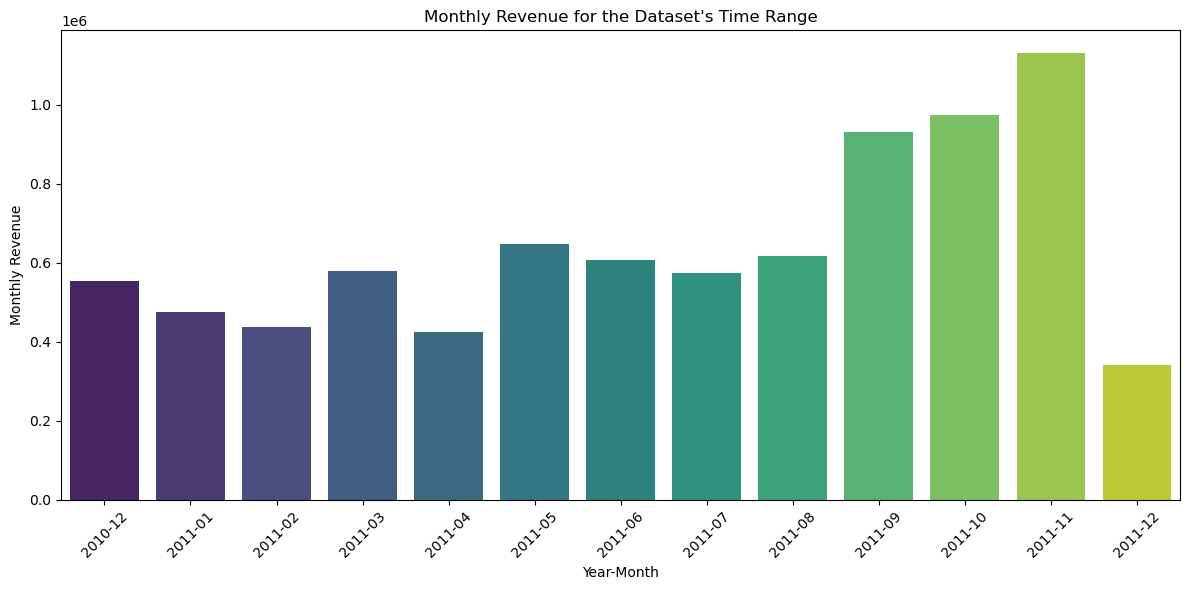

C:\Users\CompUser\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\CompUser\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 640x480 with 0 Axes>

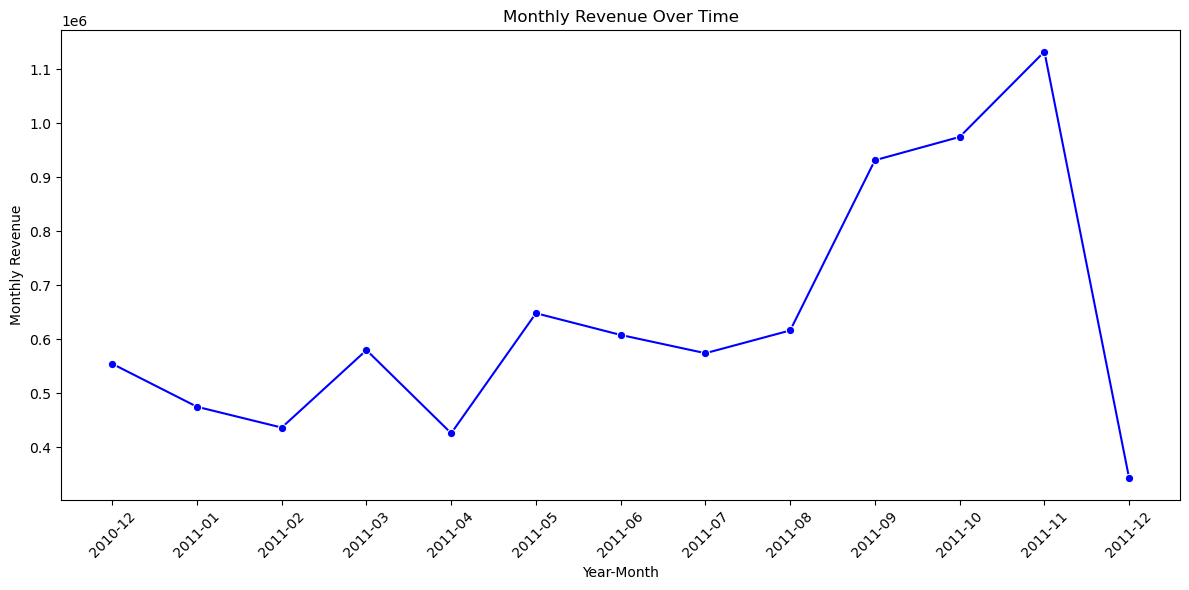

In [7]:
# Step 2: Create the connection string using Windows Authentication
connection_string = (
    "DRIVER={ODBC Driver 17 for SQL Server};"
    f"SERVER={server};"
    f"DATABASE={database};"
    "Trusted_Connection=yes;"
)
try:
    # Step 3: Establish the connection
    connection = pyodbc.connect(connection_string)

    # Step 4: Define the SQL query to calculate monthly revenue for the dataset's time range
    query = """
    SELECT 
        FORMAT(InvoiceDate, 'yyyy-MM') AS YearMonth,  -- Formats the InvoiceDate as Year-Month
        SUM(Quantity * UnitPrice) AS MonthlyRevenue   -- Calculates total revenue for each month
    FROM 
        OnlineRetail
    WHERE 
        CustomerID IS NOT NULL  -- Exclude any null CustomerID values to ensure valid transactions
    GROUP BY 
        FORMAT(InvoiceDate, 'yyyy-MM')  -- Group by formatted Year-Month
    ORDER BY 
        YearMonth;  -- Order the results by Year-Month
    """

    # Step 5: Execute the query and fetch the results into a pandas DataFrame
    df = pd.read_sql(query, connection)

    # Step 6: Close the connection
    connection.close()

    # Step 7: Generate a bar chart for monthly revenue
    plt.figure(figsize=(12, 6))
    sns.barplot(x='YearMonth', y='MonthlyRevenue', data=df, palette='viridis')
    plt.xticks(rotation=45)
    plt.xlabel('Year-Month')
    plt.ylabel('Monthly Revenue')
    plt.title('Monthly Revenue for the Dataset\'s Time Range')
    plt.tight_layout()
    plt.show()
    plt.savefig('monthly_revenue_bar_chart.png', dpi=300, bbox_inches='tight')
    # Step 8: Generate a line graph for monthly revenue
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='YearMonth', y='MonthlyRevenue', data=df, marker='o', color='b')
    plt.xticks(rotation=45)
    plt.xlabel('Year-Month')
    plt.ylabel('Monthly Revenue')
    plt.title('Monthly Revenue Over Time')
    plt.tight_layout()
    plt.show()

except Exception as e:
    print("An error occurred while connecting to the database or executing the query:", e)